In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [41]:
data = pd.read_csv('Nashville_housing_data_2013_2016.csv')

In [42]:
# test for duplicates
print(data.duplicated().value_counts())

False    56636
Name: count, dtype: int64


In [44]:
# detect missing values
# total values in each column
data.isnull().sum()

Unnamed: 0.1                             0
Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/ Condo   #                     50527
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Address                              30619
City                                 30619
State                                30619
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
image                                31301
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Ar

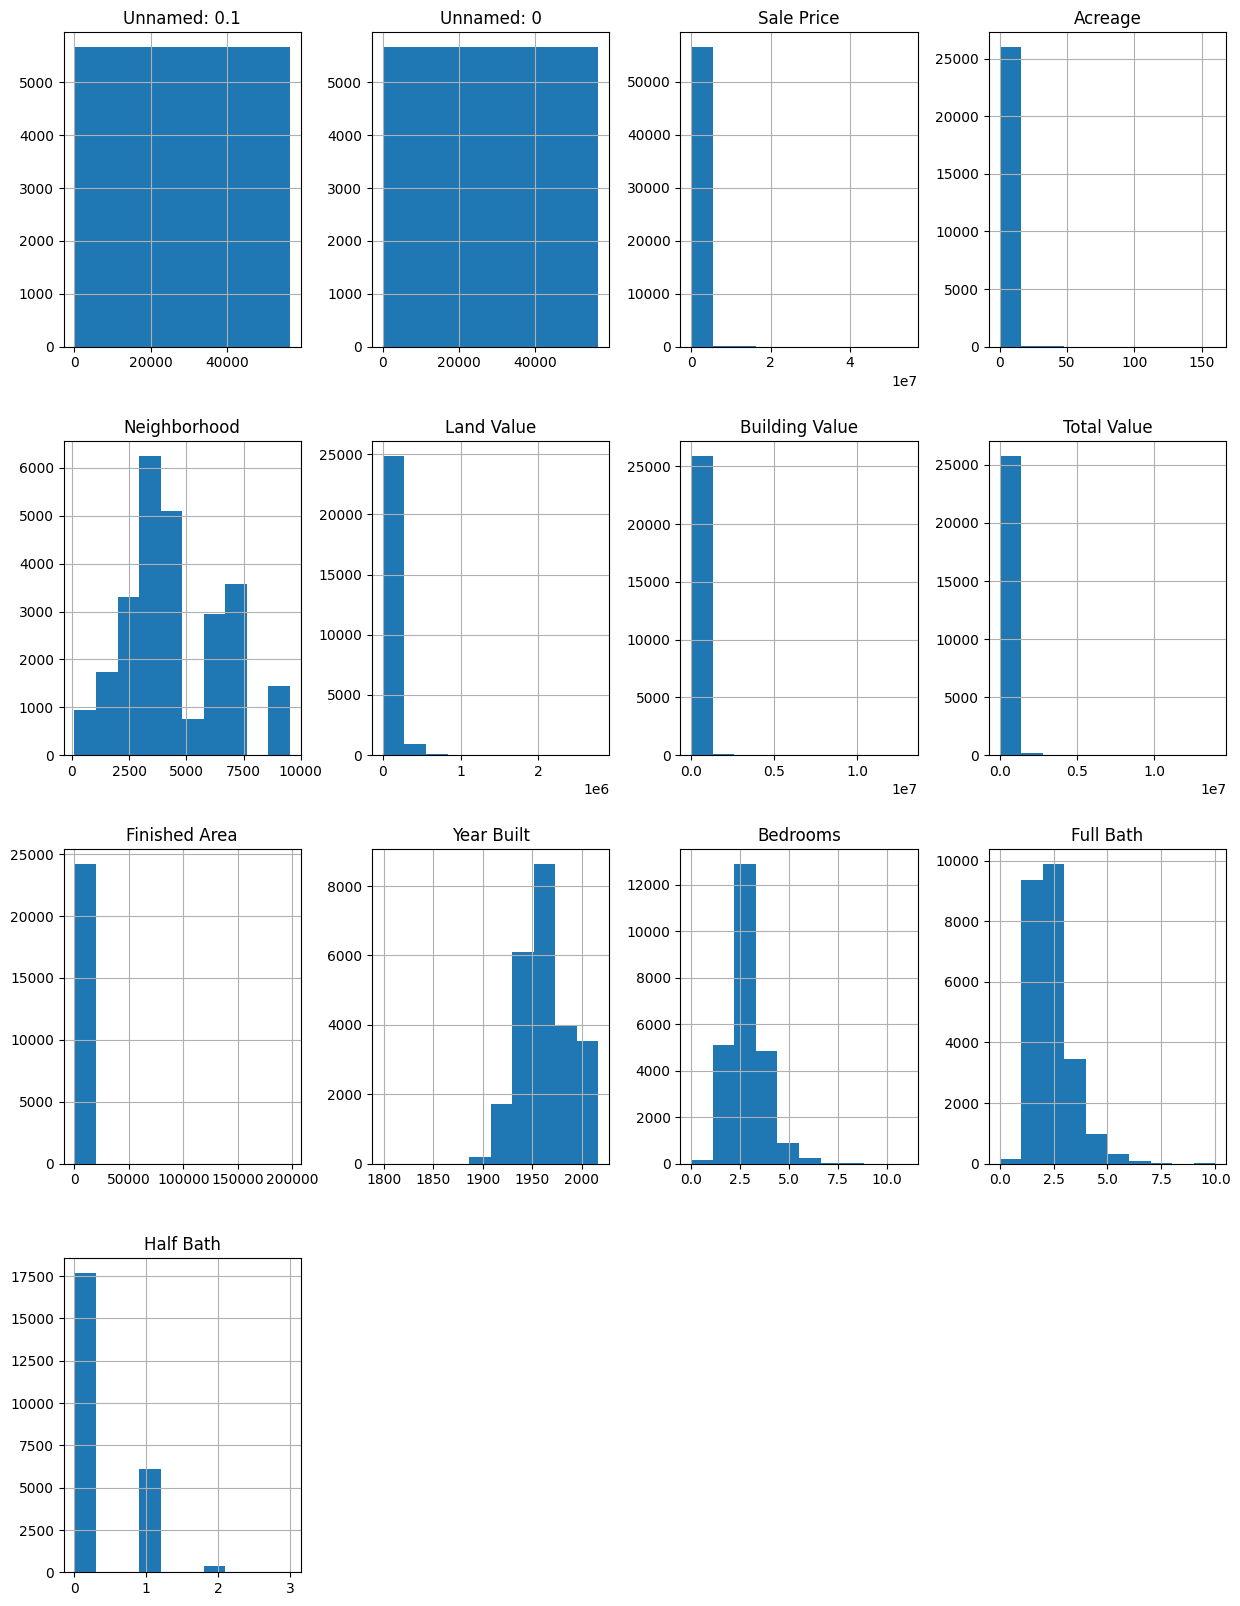

In [46]:
# visualizing data by histograms
data.hist(figsize=(15,20))
plt.show()

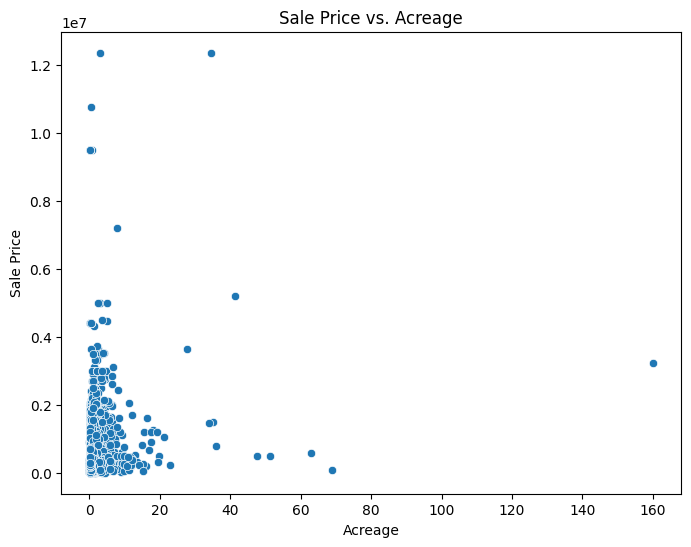

In [47]:
# Scatter plot for Sale Price vs. Acreage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Acreage', y='Sale Price', data=data)
plt.title('Sale Price vs. Acreage')
plt.xlabel('Acreage')
plt.ylabel('Sale Price')
plt.show()

In [48]:
# Get the top 10 land use categories
top_land_use = data['Land Use'].value_counts().nlargest(10)

# Print the top 10 land use categories
print("Top 10 Land Use Categories:")
print(top_land_use)


Top 10 Land Use Categories:
Land Use
SINGLE FAMILY              34268
RESIDENTIAL CONDO          14081
VACANT RESIDENTIAL LAND     3586
VACANT RES LAND             1575
DUPLEX                      1389
ZERO LOT LINE               1049
CONDO                        252
RESIDENTIAL COMBO/MISC        95
TRIPLEX                       92
QUADPLEX                      39
Name: count, dtype: int64
